# Convolutional Neural Network

### Importing the libraries

In [1]:
#to deeply understanding see in:
#https://www.superdatascience.com/blogs/the-ultimate-guide-to-convolutional-neural-networks-cnn

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.15.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
#we pre process images
#in training and test set we have cats and dogs classes
#in training set each class have 4000 images
#we will apply some transformations on training set images, but not on test set
#we not apply the these transformations of test set because we want to avoid overfitting
#if we don't apply these transformations when we train CNN of training set we will get huge differnt
#in accuracy between training set and test set
#because the training set trained well but if we will not do these transformations (See below)
#each image in test that will be little bit diffrent the model can predict results that not correct
#lot of images of test set will be kind of biased images and the test set prediction will be not accurate enough
#these transformations are geometrical transformations, zooms, rotations on our images
#so what we do some transactions like shift some pixels and rotate images and do horizontal flips
#also we do some zoom in and zoom out and series of transformations to modify images and to augment images
#that's called Image Augmentation, and that will help to CNN not over learn and over train the images which 
#cause an overfitting

#we use 3 transformations:
#horizontal_flip:Boolean. Randomly flip inputs horizontally.
#shear_range:Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
#zoom_range:Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range].
#Also we have, rescale:rescaling factor. If None or 0, no rescaling is applied, 
#otherwise we multiply the data by the value provided (after applying all other transformations). Defaults to None.

train_datagen = ImageDataGenerator(
        rescale=1./255, #feature scale for each single pixel divid by 255 the possible pixels value [0-255]
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_data_dir = 'dataset/training_set'
img_height = img_width = 64 #make faster training 
batch_size = 32 #how many images will be in one batch
train_set = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
#in test set each class have 1000 images
test_datagen = ImageDataGenerator(rescale=1./255)

test_data_dir = 'dataset/test_set'
test_set = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [6]:
filters_num = 32 #filters: number of feature detectors to image
kernel_dimentions = 3 #fd_size: height and width of the kernel/feature detector 3x3
mode = 3 #this is color mode, 3 for RGB images
#input_shape needed only for the first layer - input layer
cnn.add(tf.keras.layers.Conv2D(filters=filters_num, kernel_size=kernel_dimentions, activation='relu', input_shape=(img_height, img_width, mode)))

### Step 2 - Pooling

In [7]:
pool_dimentions = 2 #2X2 frame of max pooling
pixels_shift_frame = 2 #shift frame every 2 pixels
cnn.add(tf.keras.layers.MaxPool2D(pool_size=pool_dimentions, strides=pixels_shift_frame))

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=filters_num, kernel_size=kernel_dimentions, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=pool_dimentions, strides=pixels_shift_frame))

### Step 3 - Flattening

In [9]:
#the flatten max pooling become to a layer in CNN
#in fact from this stage we are move for ANN configuration but fully connected (Dense class see below) and more powerfull
#that will be input layer of ANN
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [10]:
neurons_num = 128 #it's computer vision problem and it's complex problem and we need more neurons for that
cnn.add(tf.keras.layers.Dense(units = neurons_num, activation='relu'))

### Step 5 - Output Layer

In [11]:
#it's binary classification so we need one neuron that encode binary class - cat or dog
#also sigmoid is better activation function to binary classification (know the probability of each prediction res)
cnn.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [12]:
#binary_crossentropy for classification like here
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [13]:
#here train the model with train set and in the same time evaluate it with test set
#25 is number that chosen after experience
#train the model with 25 epochs could take 15-20 minutes so pay attention
#we have 8000 images and each batch is 32 so each epoch is 250 steps
cnn.fit(x = train_set, validation_data = test_set, epochs = 25)

Epoch 1/25


250/250 [==============================] - 96s 371ms/step - loss: 0.6371 - accuracy: 0.6306 - val_loss: 0.5827 - val_accuracy: 0.6905
Epoch 2/25
250/250 [==============================] - 88s 350ms/step - loss: 0.5758 - accuracy: 0.6929 - val_loss: 0.5661 - val_accuracy: 0.7165
Epoch 3/25
250/250 [==============================] - 92s 366ms/step - loss: 0.5514 - accuracy: 0.7170 - val_loss: 0.5433 - val_accuracy: 0.7270
Epoch 4/25
250/250 [==============================] - 90s 362ms/step - loss: 0.5241 - accuracy: 0.7385 - val_loss: 0.5456 - val_accuracy: 0.7215
Epoch 5/25
250/250 [==============================] - 93s 370ms/step - loss: 0.4956 - accuracy: 0.7541 - val_loss: 0.4929 - val_accuracy: 0.7665
Epoch 6/25
250/250 [==============================] - 89s 353ms/step - loss: 0.4816 - accuracy: 0.7680 - val_loss: 0.5116 - val_accuracy: 0.7615
Epoch 7/25
250/250 [==============================] - 92s 369ms/step - loss: 0.4611 - accuracy: 0.7801 - val_loss: 0.4666 - val_

## Part 4 - Making a single prediction

In [70]:
import numpy as np
from keras.preprocessing import image
import random

#randomize an image for prediction
img_class = 'dogs' if random.randint(0,1) == 0 else 'cats'
prefix = 'dog' if img_class == 'dogs' else 'cat'
image_num = random.randint(4001,5000)
path = 'dataset/test_set/'+img_class+'/'+prefix+'.'+str(image_num)+'.jpg'

#target size for fit this image to the model training
test_image = image.load_img(path, target_size = (img_height, img_width))
test_image = image.img_to_array(test_image) #convert image to array

#add extra dimention into corresponding into the batch (of images)
#it needed because cnn not trained on single images
#so we need that even in the batch have single image (and not 32 as we trained)
#we add the extra dimention, and the dimention of batch always will be the first dimention
#(in each batch you get diffrent images so this image will be the first dimention)
#so we add axis = 0
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
train_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 27ms/step


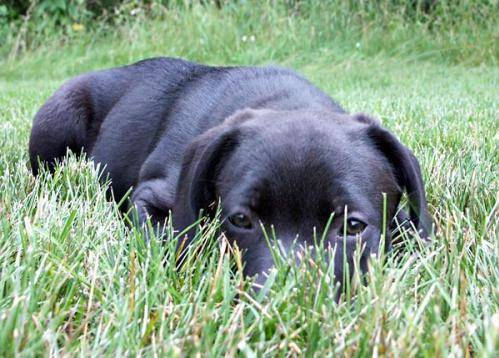

In [71]:
from IPython.display import Image
Image(filename=path) 

In [72]:
print('The image above identified as:', prediction)

The image above identified as: dog
